# 1. Imports

## Import libraries

In [167]:
import warnings
warnings.filterwarnings('ignore')

import math
import sqlite3 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from math import ceil 
from collections import Counter
from scipy.cluster.hierarchy import dendrogram

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.base import clone
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

from pandas_profiling import ProfileReport

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

## Import dataset

In [2]:
df = pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')

__Copy of the original dataset:__

In [3]:
df_original = df.copy()

-------------------------------

# 2. Data Exploration

## Data Overview

In [4]:
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [5]:
df.shape

(14942, 31)

In [6]:
df.dtypes

ID                              int64
Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOf

In [7]:
# check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14942.0,17470.500000,4313.528196,10000.00,13735.25,17470.50,21205.750,24941.00
Age,14942.0,26.015794,14.156582,0.00,19.00,23.00,31.000,87.00
Income,14447.0,2230.816086,1566.527734,0.00,1470.00,1990.00,2790.000,10890.00
DaysWithoutFrequency,14942.0,81.224936,144.199576,0.00,13.00,41.00,83.750,1745.00
LifetimeValue,14942.0,302.561871,364.319566,0.00,83.60,166.20,355.075,6727.80
UseByTime,14942.0,0.047116,0.211893,0.00,0.00,0.00,0.000,1.00
AthleticsActivities,14906.0,0.007380,0.085590,0.00,0.00,0.00,0.000,1.00
WaterActivities,14905.0,0.296209,0.456600,0.00,0.00,0.00,1.000,1.00
FitnessActivities,14907.0,0.576038,0.494201,0.00,0.00,1.00,1.000,1.00
DanceActivities,14906.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


In [8]:
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [9]:
df[df.duplicated(subset=['ID'])]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


# 3. Data Preprocessing

In [10]:
# fix wrong dtypes

df['Gender'] = LabelEncoder().fit_transform(df['Gender']) # 0 Female | 1 Male

bool = ['Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
        'DanceActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities',
        'NatureActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout']  
for i in bool:
    df[i]=df[i].astype("boolean") # converting to "boolean" over "bool" allows preservation of NaNs

date_columns = ['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit']
for i in date_columns:
    df[i] = pd.to_datetime(df[i], format='%Y-%m-%d')

df.dtypes

ID                                     int64
Age                                    int64
Gender                               boolean
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int64
LifetimeValue                        float64
UseByTime                            boolean
AthleticsActivities                  boolean
WaterActivities                      boolean
FitnessActivities                    boolean
DanceActivities                      boolean
TeamActivities                       boolean
RacketActivities                     boolean
CombatActivities                     boolean
NatureActivities                     boolean
SpecialActivities                    boolean
OtherActivities                      boolean
NumberOfFr

In [11]:
# Duplicated observations
df.duplicated().sum()

0

In [12]:
# Remove column 'ID' because it's an identifier and doesn't contribute to the clustering process
df.drop('ID', axis=1, inplace=True)
df[df.duplicated(keep=False)]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
8942,12,False,0.0,2019-06-18,2019-09-10,2019-07-01,2019-12-31,2019-07-31,41,73.35,...,False,14.0,7,5.0,44.3,10,1,False,0,True
12873,12,False,0.0,2019-06-18,2019-09-10,2019-07-01,2019-12-31,2019-07-31,41,73.35,...,False,14.0,7,5.0,44.3,10,1,False,0,True


In [13]:
# Remove columns 'DanceActivities' and 'NatureActivities' because both have only 1 value
df = df.drop(columns=['DanceActivities','NatureActivities'])

#### Enrollment

In [14]:
# Não há nenhuma incoerência em que EnrollmentStart seja depois de EnrollmentFinish
df[df['EnrollmentStart'] > df['EnrollmentFinish']]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [15]:
# Não há nenhuma incoerência em que DateLastVisit seja depois de EnrollmentFinish, quando dropout=1
df[(df['Dropout'] == 1) & (df['DateLastVisit'] > df['EnrollmentFinish'])]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [16]:
# Não há nenhuma observação em que EnrollmentStart e EnrollmentFinish sejam iguais e Dropout=1.
# Isso só acontece quando o cliente ainda está inscrito (Dropout=0)
df[(df['EnrollmentStart'] == df['EnrollmentFinish']) & df['Dropout'] == 1]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [17]:
# Se dropout=0 (o cliente ainda está inscrito), então EnrollmentFinish deve ser a data de até quando foram recolhidos os dados: 2019-10-31.
df.loc[df['Dropout'] == 0, 'EnrollmentFinish'] = pd.to_datetime('2019-10-31')

In [18]:
# Calculate the difference in days between EnrollmentStart and EnrollmentFinish.
df['DaysEnrolled'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

#### DaysWithoutFrequency

In [19]:
(df['DaysWithoutFrequency']>365).value_counts()

# ideia: quem não vai há mais de um ano dropout==1 e DaysWithoutFrequency desses clientes passavam a ser 365

DaysWithoutFrequency
False    14570
True       372
Name: count, dtype: int64

In [20]:
# Identify customers with more than 365 days without frequency
condition = (df['DaysWithoutFrequency'] > 365)

# Update 'Dropout' status to 1 for identified customers
df.loc[condition, 'Dropout'] = True

# Adjust 'DaysWithoutFrequency' to 365 for identified customers
df.loc[condition, 'DaysWithoutFrequency'] = 365

# Adjust 'DaysEnrolled' for identified customers
df.loc[condition, 'DaysEnrolled'] -= (df.loc[condition, 'DaysWithoutFrequency'] - 365)

#### Activities

In [21]:
activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                    'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

# Fill missing values with the mode
for column in activity_columns:
    mode_value = df[column].mode().iloc[0]  # Calculate the mode
    df[column] = df[column].fillna(mode_value)

df.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout                         0
DaysEnrolled                    0
dtype: int64

In [22]:
# Create a new column 'TotalActivities' by summing the binary columns
df['NumberOfActivities'] = df[activity_columns].sum(axis=1)

df['NumberOfActivities'].value_counts(normalize=True)

NumberOfActivities
1    0.910989
2    0.080244
3    0.006693
0    0.001339
4    0.000602
5    0.000134
Name: proportion, dtype: Float64

In [23]:
pd.DataFrame(df[activity_columns].sum(axis=0), columns=['ActivityCount']).sort_values('ActivityCount', ascending=False)

# pode ser uma boa coisa para a exploração!

,ActivityCount
FitnessActivities,8622
WaterActivities,4415
CombatActivities,1609
TeamActivities,828
SpecialActivities,395
RacketActivities,349
AthleticsActivities,110
OtherActivities,28


#### HasReferences

In [24]:
# Em certas observações, 'HasReferences' tem valor 1 quando 'NumberOfReferences’ é 0
df[['HasReferences']].mode().loc[0]

HasReferences    False
Name: 0, dtype: boolean

In [25]:
#Como a moda de 'HasReferences' é 0, então nas observações em que 'HasReferences'==1 e 'NumberOfReferences'==0,
#mudamos a variável 'HasReferences' para 0, em vez de mudarmos 'NumberOfReferences' para outro valor.

df.loc[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0), 'HasReferences'] = False

In [26]:
df[(df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0)]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities


------------------

In [27]:
df_copy = df.copy()

In [28]:
df_copy.drop(['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart',
              'LastPeriodFinish', 'DateLastVisit'], axis=1, inplace=True)

In [29]:
df_copy.drop('HasReferences', axis=1, inplace=True)

In [30]:
df_copy.drop(['UseByTime','AllowedNumberOfVisitsBySLA','AllowedWeeklyVisitsBySLA','RealNumberOfVisits'], axis=1, inplace=True)

In [31]:
df_copy.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities
0,60,False,5500.0,1,89.35,False,False,True,False,False,False,False,False,9.0,7,0,0,False,58,1
1,29,False,2630.0,60,479.20,False,False,False,False,False,False,True,False,23.0,1,2,0,True,398,1
2,23,True,1980.0,7,37.60,False,False,True,False,False,False,False,False,6.0,0,0,0,True,30,1
3,9,True,0.0,22,155.40,False,False,False,True,False,False,False,False,20.0,2,0,0,True,160,1
4,35,True,4320.0,210,373.20,False,False,True,False,False,False,False,False,41.0,0,3,0,True,778,1


In [32]:
df_copy.columns

Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'NumberOfRenewals', 'NumberOfReferences', 'Dropout',
       'DaysEnrolled', 'NumberOfActivities'],
      dtype='object')

In [33]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'NumberOfRenewals',
                   'NumberOfReferences', 'DaysEnrolled', 'NumberOfActivities']
non_metric_features = df_copy.columns.drop(metric_features).tolist()
print(non_metric_features)

['Gender', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout']


---------------------

## Missing Values

In [34]:
# Count of missing values
df_copy.isna().sum().sort_values()

Age                       0
Dropout                   0
NumberOfReferences        0
NumberOfRenewals          0
AttendedClasses           0
OtherActivities           0
SpecialActivities         0
CombatActivities          0
DaysEnrolled              0
RacketActivities          0
FitnessActivities         0
WaterActivities           0
AthleticsActivities       0
LifetimeValue             0
DaysWithoutFrequency      0
Gender                    0
TeamActivities            0
NumberOfActivities        0
NumberOfFrequencies      26
Income                  495
dtype: int64

In [35]:
# Fill missing values with the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_copy[['Income', 'NumberOfFrequencies']] = imputer.fit_transform(df_copy[['Income', 'NumberOfFrequencies']])

In [36]:
# New column 'Regularity'
df_copy['Regularity'] = df_copy['NumberOfFrequencies'] / df_copy['DaysEnrolled']

In [37]:
# Recount of missing values
df_copy.isna().sum()

Age                     0
Gender                  0
Income                  0
DaysWithoutFrequency    0
LifetimeValue           0
AthleticsActivities     0
WaterActivities         0
FitnessActivities       0
TeamActivities          0
RacketActivities        0
CombatActivities        0
SpecialActivities       0
OtherActivities         0
NumberOfFrequencies     0
AttendedClasses         0
NumberOfRenewals        0
NumberOfReferences      0
Dropout                 0
DaysEnrolled            0
NumberOfActivities      0
Regularity              0
dtype: int64

In [38]:
# Handling Boolean Columns
boolean_columns = ['Gender','AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
                   'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'Dropout']

df_copy[boolean_columns] = df_copy[boolean_columns].astype(int)
df_copy.dtypes

Age                       int64
Gender                    int32
Income                  float64
DaysWithoutFrequency      int64
LifetimeValue           float64
AthleticsActivities       int32
WaterActivities           int32
FitnessActivities         int32
TeamActivities            int32
RacketActivities          int32
CombatActivities          int32
SpecialActivities         int32
OtherActivities           int32
NumberOfFrequencies     float64
AttendedClasses           int64
NumberOfRenewals          int64
NumberOfReferences        int64
Dropout                   int32
DaysEnrolled              int64
NumberOfActivities        Int64
Regularity              float64
dtype: object

In [39]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'NumberOfRenewals',
                   'NumberOfReferences', 'DaysEnrolled', 'NumberOfActivities', 'Regularity']

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.0

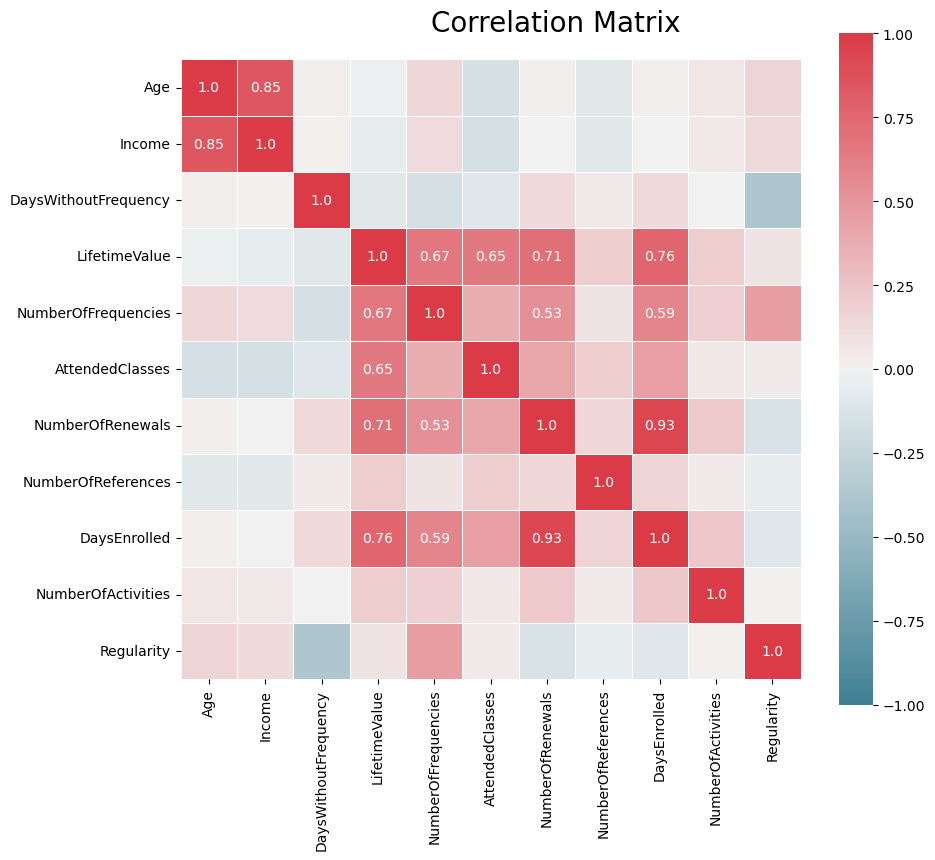

In [40]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_copy[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

## Treating Outliers

In [41]:
df_copycopy = df_copy.copy()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol

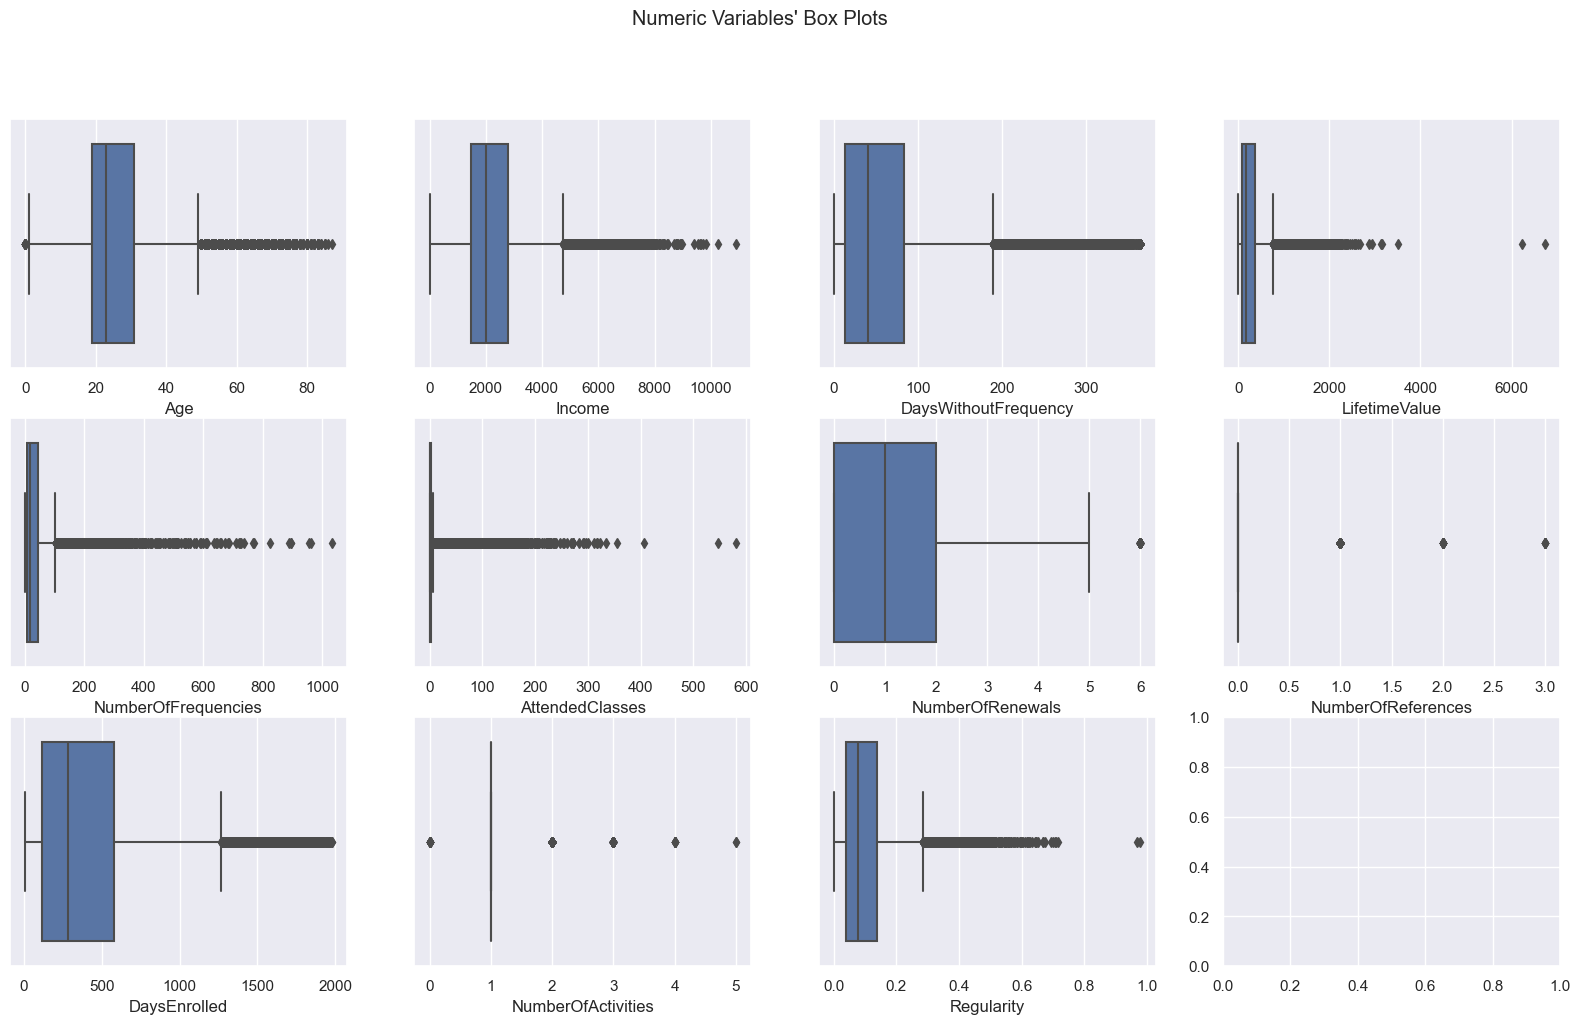

In [42]:
# Numeric Variables' Histograms
sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_copycopy[feat], ax=ax)
plt.suptitle("Numeric Variables' Box Plots")
plt.show()

__"Manually" filtering the dataset's outliers__

In [43]:
filters1 = ((df_copycopy['Income']<=8000) &
            (df_copycopy['LifetimeValue']<=2500) &
            (df_copycopy['NumberOfFrequencies']<=450) &
            (df_copycopy['AttendedClasses']<=200) &
            (df_copycopy['Regularity']<0.8)) 

df_copycopy1 = df_copycopy[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_copycopy1.shape[0] / df_original.shape[0], 4))
print('Percentage of data removed:', np.round(1 - np.round(df_copycopy1.shape[0] / df_original.shape[0], 4), 4))

Percentage of data kept after removing outliers: 0.99
Percentage of data removed: 0.01


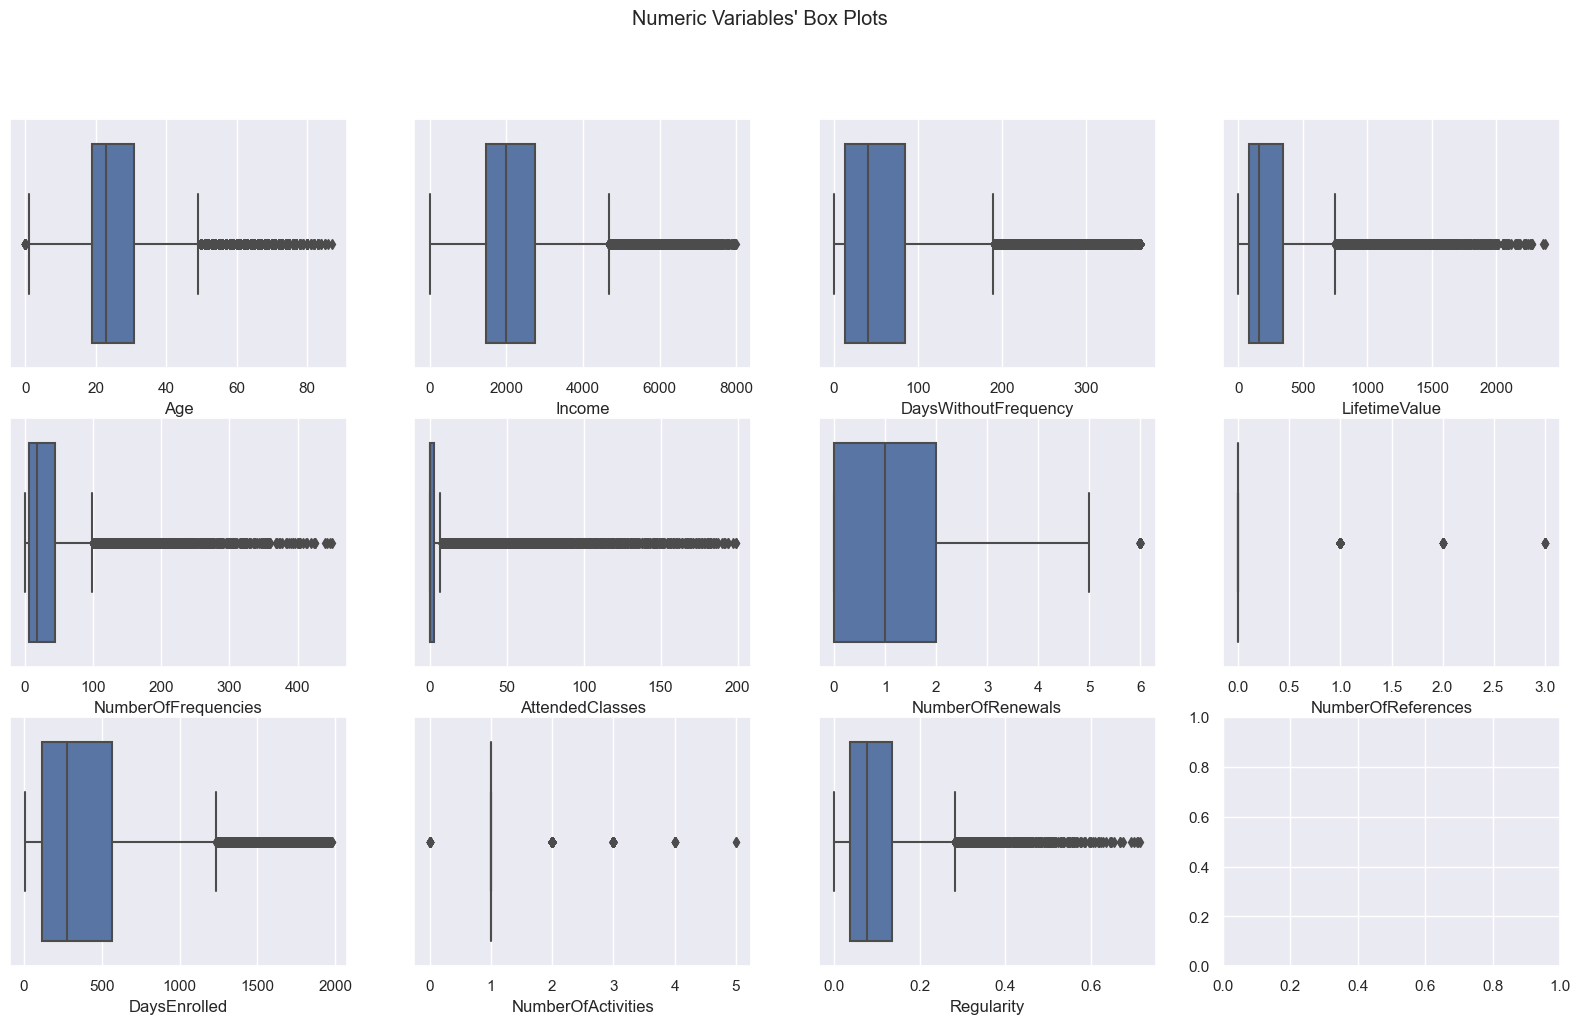

In [44]:
df_1 = df_copycopy1.copy()

sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_1[feat], ax=ax)

plt.suptitle("Numeric Variables' Box Plots")
plt.show()

__Outlier removal using only the IQR method__

In [45]:
# # Calculate quartiles and IQR
# q25 = df[metric_features].quantile(.25)
# q75 = df[metric_features].quantile(.75)
# iqr = (q75 - q25)

# # Define lower and upper bounds
# upper_lim = q75 + 1.5 * iqr   # 1.5 is a value we can change
# lower_lim = q25 - 1.5 * iqr

# # Remove outliers
# filters2 = []
# for metric in metric_features:
#     llim = lower_lim[metric]
#     ulim = upper_lim[metric]
#     filters2.append(df[metric].between(llim, ulim, inclusive='both'))

# filters2 = pd.Series(np.all(filters2, 0))
# df_2 = df[filters2]

# print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

__Combining different outlier methods__

In [46]:
# # More robust/consistent outlier detection method:
# df_3 = df[(filters1 | filters2)]
# print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / df_original.shape[0], 4))
# # this way only if i have an observation consider outlier in both of the approaches than i will call it an outlier

-------------------------
**Isolation Forest**

In [47]:
# from sklearn.ensemble import IsolationForest
# df_copycopy2 = df_copy.copy()

In [48]:
# # Model building
# model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
# model.fit(df_copycopy2)

# # Adding 'scores' and 'anomaly' colums to df
# scores = model.decision_function(df_copycopy2)
# anomaly = model.predict(df_copycopy2)

# df_copycopy2['scores'] = scores
# df_copycopy2['anomaly'] = anomaly

# anomaly = df_copycopy2.loc[df_copycopy2['anomaly']==-1]
# anomaly_index = list(anomaly.index)
# print('Total number of outliers is:', len(anomaly))

In [49]:
# # dropping outliers
# df_copycopy2 = df_copycopy2.drop(anomaly_index, axis = 0).reset_index(drop=True)

# # dropping columns that we don't need any more
# df_copycopy2.drop(['scores', 'anomaly'], axis = 1, inplace =True)


# sns.set()
# fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# for ax, feat in zip(axes.flatten(), metric_features):
#     sns.boxplot(x=df_copycopy2[feat], ax=ax)

# plt.suptitle("Numeric Variables' Box Plots")
# plt.tight_layout()
# plt.show()

In [50]:
df_features = df_1.copy()

## Variable selection: Redundancy VS Relevancy

**Redundancy:** Handling highly correlated variables

**Relevancy:** Selecting variables based on the relevancy of each one to the task.

Example: remove uncorrelated variables with the target, stepwise regression, use variables for product clustering, use variables for socio-demographic clustering, ...   
Variables that aren't correlated with any other variable are often also not relevant. In this case we will not focus on this a lot since we don't have a defined task yet.

In [51]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'NumberOfRenewals',
                   'NumberOfReferences', 'DaysEnrolled', 'NumberOfActivities', 'Regularity']
bin_features = ['Gender', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                'TeamActivities', 'RacketActivities', 'CombatActivities',
                'SpecialActivities', 'OtherActivities', 'Dropout']

## Scaling

__Use MinMaxScaler to scale the data:__

In [52]:
df_minmax = df_features.copy()

In [53]:
scaler = MinMaxScaler()
df_minmax[metric_features] = scaler.fit_transform(df_minmax[metric_features])
df_minmax.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity
0,0.689655,0,0.688360,0.002740,0.037640,0,0,1,0,0,...,0,0,0.017817,0.035176,0.000000,0.0,0,0.025394,0.2,0.216674
1,0.333333,0,0.329161,0.164384,0.201870,0,0,0,0,0,...,1,0,0.048998,0.005025,0.333333,0.0,1,0.198070,0.2,0.080239
2,0.264368,1,0.247810,0.019178,0.015840,0,0,1,0,0,...,0,0,0.011136,0.000000,0.000000,0.0,1,0.011173,0.2,0.279478
3,0.103448,1,0.000000,0.060274,0.065465,0,0,0,1,0,...,0,0,0.042316,0.010050,0.000000,0.0,1,0.077197,0.2,0.174402
4,0.402299,1,0.540676,0.575342,0.157216,0,0,1,0,0,...,0,0,0.089087,0.000000,0.500000,0.0,1,0.391061,0.2,0.073108


In [54]:
# Checking max and min of minmaxed variables
df_minmax[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,14793.0,0.30,0.16,0.0,0.22,0.26,0.36,1.0
Income,14793.0,0.28,0.19,0.0,0.18,0.25,0.34,1.0
DaysWithoutFrequency,14793.0,0.20,0.24,0.0,0.04,0.11,0.23,1.0
LifetimeValue,14793.0,0.12,0.14,0.0,0.04,0.07,0.15,1.0
NumberOfFrequencies,14793.0,0.08,0.12,0.0,0.01,0.04,0.10,1.0
AttendedClasses,14793.0,0.05,0.12,0.0,0.00,0.00,0.02,1.0
NumberOfRenewals,14793.0,0.20,0.23,0.0,0.00,0.17,0.33,1.0
NumberOfReferences,14793.0,0.01,0.06,0.0,0.00,0.00,0.00,1.0
DaysEnrolled,14793.0,0.21,0.21,0.0,0.06,0.14,0.28,1.0
NumberOfActivities,14793.0,0.22,0.06,0.0,0.20,0.20,0.20,1.0


__Use StandardScaler to scale the data:__

In [55]:
df_standard = df_features.copy()

In [56]:
scaler = StandardScaler()  # Standardize features by removing the mean and scaling to unit variance.
df_standard[metric_features] = scaler.fit_transform(df_standard[metric_features])
df_standard.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,NumberOfReferences,Dropout,DaysEnrolled,NumberOfActivities,Regularity
0,2.444891,0,2.187008,-0.796814,-0.603726,0,0,1,0,0,...,0,0,-0.538287,-0.093540,-0.871849,-0.131554,0,-0.859731,-0.287039,0.594933
1,0.226031,0,0.283210,-0.127213,0.561657,0,0,0,0,0,...,1,0,-0.269508,-0.334896,0.605332,-0.131554,1,-0.052329,-0.287039,-0.481600
2,-0.203426,1,-0.147964,-0.728719,-0.758422,0,0,1,0,0,...,0,0,-0.595882,-0.375122,-0.871849,-0.131554,1,-0.926223,-0.287039,1.090483
3,-1.205492,1,-1.461385,-0.558481,-0.406282,0,0,0,1,0,...,0,0,-0.327104,-0.294670,-0.871849,-0.131554,1,-0.617511,-0.287039,0.261389
4,0.655488,1,1.404262,1.575162,0.244790,0,0,1,0,0,...,0,0,0.076064,-0.375122,1.343922,-0.131554,1,0.850061,-0.287039,-0.537865


In [57]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,14793.0,-0.0,1.0,-1.85,-0.49,-0.20,0.37,4.38
Income,14793.0,-0.0,1.0,-1.46,-0.49,-0.14,0.36,3.84
DaysWithoutFrequency,14793.0,-0.0,1.0,-0.81,-0.66,-0.34,0.15,3.33
LifetimeValue,14793.0,0.0,1.0,-0.87,-0.62,-0.38,0.17,6.23
NumberOfFrequencies,14793.0,0.0,1.0,-0.69,-0.58,-0.37,0.13,7.93
AttendedClasses,14793.0,0.0,1.0,-0.38,-0.38,-0.38,-0.25,7.63
NumberOfRenewals,14793.0,-0.0,1.0,-0.87,-0.87,-0.13,0.61,3.56
NumberOfReferences,14793.0,-0.0,1.0,-0.13,-0.13,-0.13,-0.13,18.00
DaysEnrolled,14793.0,-0.0,1.0,-0.98,-0.72,-0.33,0.34,3.70
NumberOfActivities,14793.0,-0.0,1.0,-3.38,-0.29,-0.29,-0.29,12.07


# Clustering

In [129]:
df_cluster = df_standard.copy()

In [130]:
metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
                   'NumberOfFrequencies', 'AttendedClasses', 'NumberOfRenewals',
                   'NumberOfReferences', 'DaysEnrolled', 'NumberOfActivities', 'Regularity']
non_metric_features = ['Gender', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                       'TeamActivities', 'RacketActivities', 'CombatActivities',
                       'SpecialActivities', 'OtherActivities', 'Dropout']

In [131]:
def get_ss(df):
    ''' Computes the sum of squares for all variables given a dataset. '''
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

----
**MeanShift**

In [132]:
# # The following bandwidth can be automatically detected using (we need to set quantile though)
# # Based on distance to nearest neighbors for all observations
# bandwidth = estimate_bandwidth(df_cluster[metric_features], quantile=0.5, random_state=1, n_jobs=-1)
# bandwidth

In [133]:
# # Perform mean-shift clustering with bandwidth set using estimate_bandwidth
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
# ms_labels = ms.fit_predict(df_cluster[metric_features])

# ms_n_clusters = len(np.unique(ms_labels))
# print("Number of estimated clusters : %d" % ms_n_clusters)

In [134]:
# # Concatenating the labels to df_cluster
# df_concat = pd.concat([df_cluster[metric_features], pd.Series(ms_labels, index=df_cluster.index, name="ms_labels")], axis=1)
# df_concat.head()

In [135]:
# # Computing the R^2 of the cluster solution
# sst = get_ss(df_cluster[metric_features])  # get total sum of squares
# ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)

------------
**DBSCAN**

In [229]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_cluster[metric_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 4


In [230]:
Counter(dbscan_labels)

Counter({0: 13137, 1: 970, -1: 534, 2: 152})

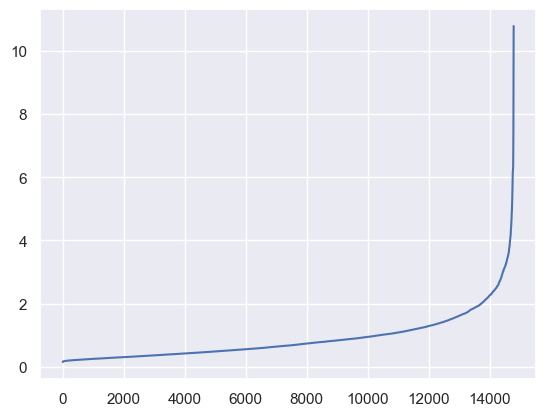

In [137]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_cluster[metric_features])
distances, _ = neigh.kneighbors(df_cluster[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [138]:
# Concatenating the labels to df
df_concat = pd.concat([df_cluster[metric_features], pd.Series(dbscan_labels, index=df_cluster.index, name="dbscan_labels")], axis=1)
df_concat.head()

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,NumberOfReferences,DaysEnrolled,NumberOfActivities,Regularity,dbscan_labels
0,2.444891,2.187008,-0.796814,-0.603726,-0.538287,-0.093540,-0.871849,-0.131554,-0.859731,-0.287039,0.594933,0
1,0.226031,0.283210,-0.127213,0.561657,-0.269508,-0.334896,0.605332,-0.131554,-0.052329,-0.287039,-0.481600,0
2,-0.203426,-0.147964,-0.728719,-0.758422,-0.595882,-0.375122,-0.871849,-0.131554,-0.926223,-0.287039,1.090483,0
3,-1.205492,-1.461385,-0.558481,-0.406282,-0.327104,-0.294670,-0.871849,-0.131554,-0.617511,-0.287039,0.261389,0
4,0.655488,1.404262,1.575162,0.244790,0.076064,-0.375122,1.343922,-0.131554,0.850061,-0.287039,-0.537865,0


In [139]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,NumberOfReferences,DaysEnrolled,NumberOfActivities,Regularity,dbscan_labels
16,1.514402,1.517031,-0.410942,1.605823,4.971671,-0.375122,2.821103,-0.131554,3.393378,2.801086,0.649256,-1
36,-0.919187,-1.461385,-0.706020,5.735464,3.109420,6.302398,2.821103,5.912181,3.407626,5.889212,0.065476,-1
60,1.872282,0.502114,-0.796814,5.073720,6.392357,-0.375122,2.821103,-0.131554,3.148782,-0.287039,1.222176,-1
69,0.870216,1.716034,0.031675,1.782790,-0.365501,0.308720,2.082513,-0.131554,2.106284,5.889212,-0.968189,-1
75,-0.275002,0.216876,-0.479037,3.013488,7.198692,-0.375122,2.082513,-0.131554,1.498358,-0.287039,3.213046,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
14827,-1.778101,-1.461385,1.597860,0.013119,-0.442295,0.147816,-0.133259,11.955916,-0.109322,-0.287039,-0.706625,-1
14829,1.657554,1.735934,0.542388,2.428182,0.440835,-0.375122,0.605332,-0.131554,1.154024,5.889212,-0.388342,-1
14832,1.299673,1.205259,1.620558,1.833010,1.074384,2.521152,1.343922,5.912181,1.662213,-0.287039,-0.202508,-1
14841,0.226031,0.130641,-0.683322,1.778306,1.035987,-0.093540,1.343922,-0.131554,1.099406,8.977338,0.018827,-1


In [140]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_cluster[metric_features])  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3231


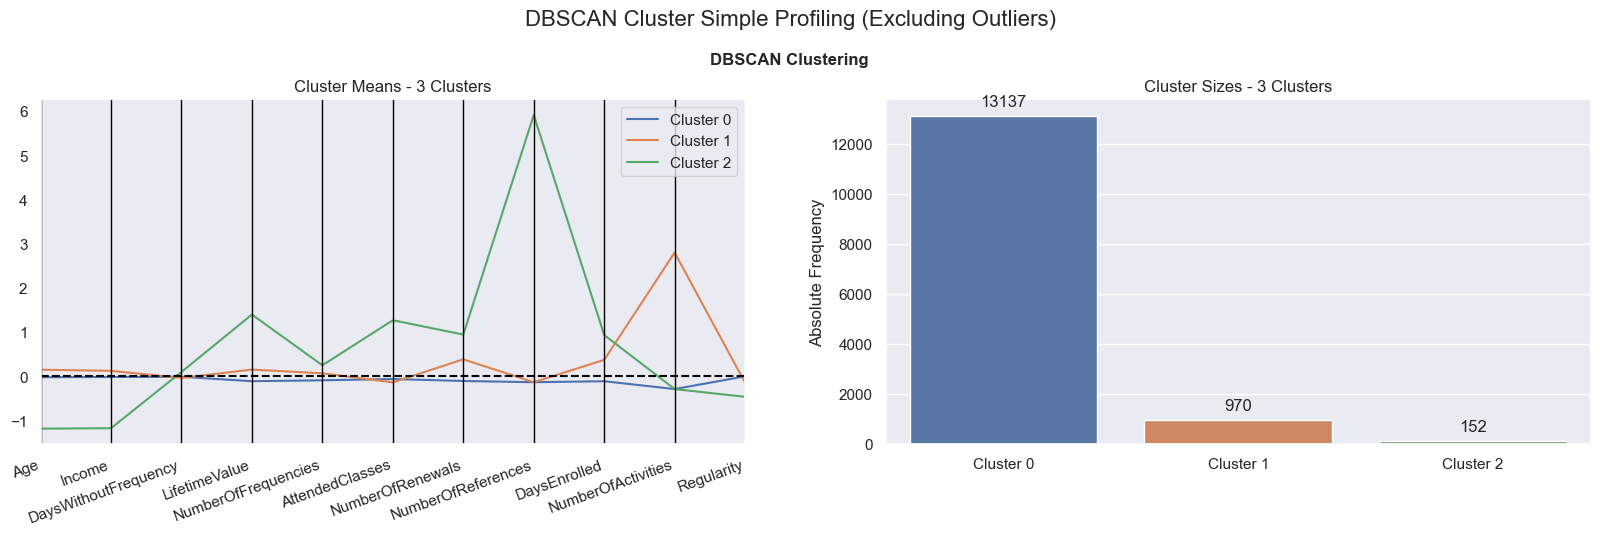

In [226]:
def cluster_profiles_dbscan(df, label_column, figsize, compar_title=""):
    """
    Pass df with a single clustering label column using DBSCAN.
    Exclude outliers (label -1) from the analysis.
    """
    sns.set()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize, squeeze=False)

    # Exclude outliers (label -1)
    df_filtered = df[df[label_column] >= 0]
    
    # Getting the cluster centroids and counts
    centroids = df_filtered.groupby(by=label_column, as_index=False).mean()
    counts = df_filtered[label_column].value_counts().reset_index()
    counts.columns = [label_column, 'counts']
    
    # Setting Data
    pd.plotting.parallel_coordinates(centroids, label_column, color=sns.color_palette(), ax=axes[0, 0])
    bar_plot = sns.barplot(x=label_column, y='counts', data=counts, ax=axes[0, 1])

    # Annotating each bar with absolute frequency
    for p in bar_plot.patches:
        bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Setting Layout
    handles, _ = axes[0, 0].get_legend_handles_labels()
    cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
    
    axes[0, 0].annotate(text=compar_title, xy=(0.95, 1.1), xycoords='axes fraction', fontsize=12, fontweight='heavy') 
    axes[0, 0].legend(handles, cluster_labels)
    axes[0, 0].axhline(color="black", linestyle="--")
    axes[0, 0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=12)
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=20, ha='right')
    
    axes[0, 1].set_xticklabels(cluster_labels)
    axes[0, 1].set_xlabel("")
    axes[0, 1].set_ylabel("Absolute Frequency")
    axes[0, 1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=12)
    
    plt.subplots_adjust(hspace=1.0, top=0.8)
    plt.suptitle("DBSCAN Cluster Simple Profiling (Excluding Outliers)", fontsize=16)
    plt.show()

# Profiling a single DBSCAN clustering
cluster_profiles_dbscan(
    df=df_concat[metric_features + ['dbscan_labels']], 
    label_column='dbscan_labels', 
    figsize=(20, 5), 
    compar_title="DBSCAN Clustering"
)

-----------
**GMM**

In [141]:
# # Performing GMM clustering
# gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
# gmm_labels = gmm.fit_predict(df_cluster[metric_features])
# labels_proba = gmm.predict_proba(df_cluster[metric_features])

In [142]:
# The estimated component weights
#gmm.weights_

In [143]:
# The estimated mean vectors of the Components
#gmm.means_

In [144]:
# The estimated covariance matrices of the Components
#gmm.covariances_.shape

In [145]:
# # Selecting number of components based on AIC and BIC
# n_components = np.arange(1, 16)
# models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_cluster[metric_features])
#           for n in n_components]

# bic_values = [m.bic(df_cluster[metric_features]) for m in models]
# aic_values = [m.aic(df_cluster[metric_features]) for m in models]
# plt.plot(n_components, bic_values, label='BIC')
# plt.plot(n_components, aic_values, label='AIC')
# plt.legend(loc='best')
# plt.xlabel('n_components')
# plt.xticks(n_components)
# plt.show()

In [146]:
# # Concatenating the labels to df
# df_concat = pd.concat([df_cluster[metric_features], pd.Series(gmm_labels, index=df_cluster.index, name="gmm_labels")], axis=1)
# df_concat.head()

In [147]:
# # Computing the R^2 of the cluster solution
# sst = get_ss(df_cluster[metric_features])  # get total sum of squares
# ssw_labels = df_concat.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)

------------

In [148]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_cluster[metric_features])
Counter(dbscan_labels)

Counter({0: 13137, 1: 970, -1: 534, 2: 152})

In [149]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df_cluster[dbscan_labels==-1].copy() # this has all the noise rows

# New df without outliers
df_new = df_cluster[dbscan_labels!=-1].copy()

**Clustering by Perspectives:**

In [197]:
# Split variables into perspectives (requires critical thinking and domain knowledge)
demographic_features = [
    'Age',
    'Gender',
    'Income',
    'LifetimeValue'
]

activities_features = [
    'AthleticsActivities',
    'WaterActivities',
    'TeamActivities',
    'CombatActivities',
    'SpecialActivities',
    'OtherActivities',
    'AttendedClasses',
    'NumberOfActivities'
]

membership_features = [
    'NumberOfFrequencies', 
    'AttendedClasses', 
    'NumberOfRenewals',
#    'NumberOfReferences', 
    'NumberOfActivities', 
    'Dropout',
    'DaysEnrolled',
#    'Regularity'
]

df_dem = df_new[demographic_features].copy()
df_act = df_new[activities_features].copy()
df_member = df_new[membership_features].copy()

In [151]:
def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    ''' Loop over different values of k.
        To be used with sklearn clusterers. '''
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df) 
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [152]:
# Set up the clusterers
kmeans = KMeans(init='k-means++', n_init=20, random_state=42)
hierarchical = AgglomerativeClustering(metric='euclidean')

In [198]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_dem, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(df_dem, hierarchical.set_params(linkage=linkage))

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.382083,0.358136,0.113362,0.000854,0.369372
3,0.566324,0.503569,0.392822,0.084479,0.534721
4,0.643970,0.536862,0.394871,0.085144,0.604815
5,0.697272,0.549026,0.398695,0.085808,0.652739
6,0.742130,0.550855,0.422047,0.086545,0.699763
7,0.772017,0.583750,0.448089,0.087084,0.735793
8,0.791507,0.593315,0.608373,0.087728,0.763965
9,0.806010,0.685998,0.609806,0.088242,0.775868


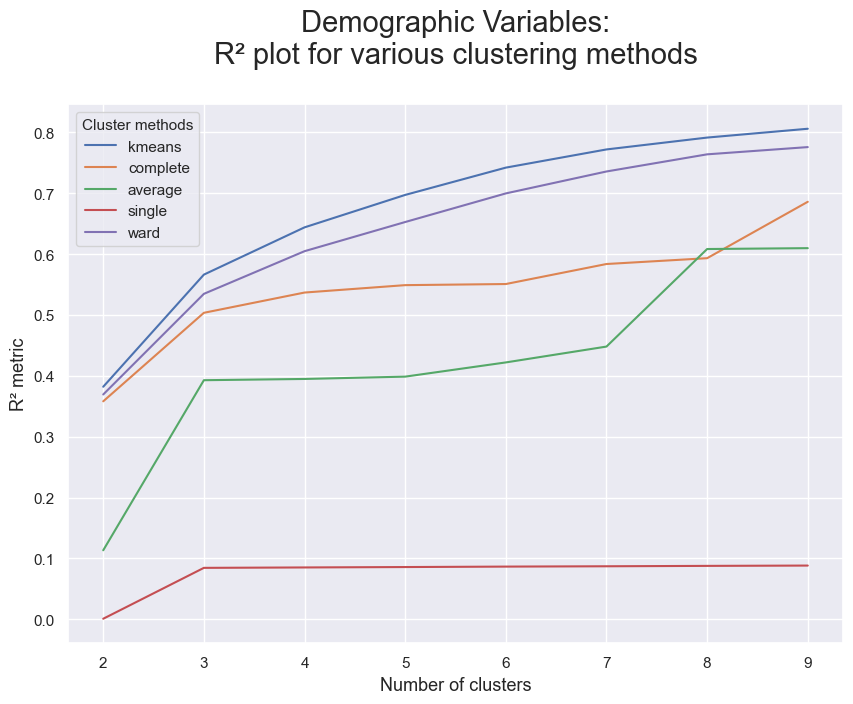

In [199]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [200]:
# Obtaining the R² scores for each cluster solution on membership variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_member, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(df_member, hierarchical.set_params(linkage=linkage))

pd.DataFrame(r2_scores)

,kmeans,complete,average,single,ward
2,0.390045,0.186826,0.201848,0.159199,0.324703
3,0.517936,0.432614,0.263095,0.159652,0.475000
4,0.616124,0.456192,0.425194,0.159999,0.589851
5,0.682939,0.511642,0.601042,0.160444,0.659280
6,0.727710,0.522528,0.612192,0.163003,0.692108
7,0.759973,0.530747,0.639043,0.163546,0.723043
8,0.784399,0.541335,0.640476,0.163781,0.748055
9,0.805417,0.558256,0.643045,0.164255,0.771291


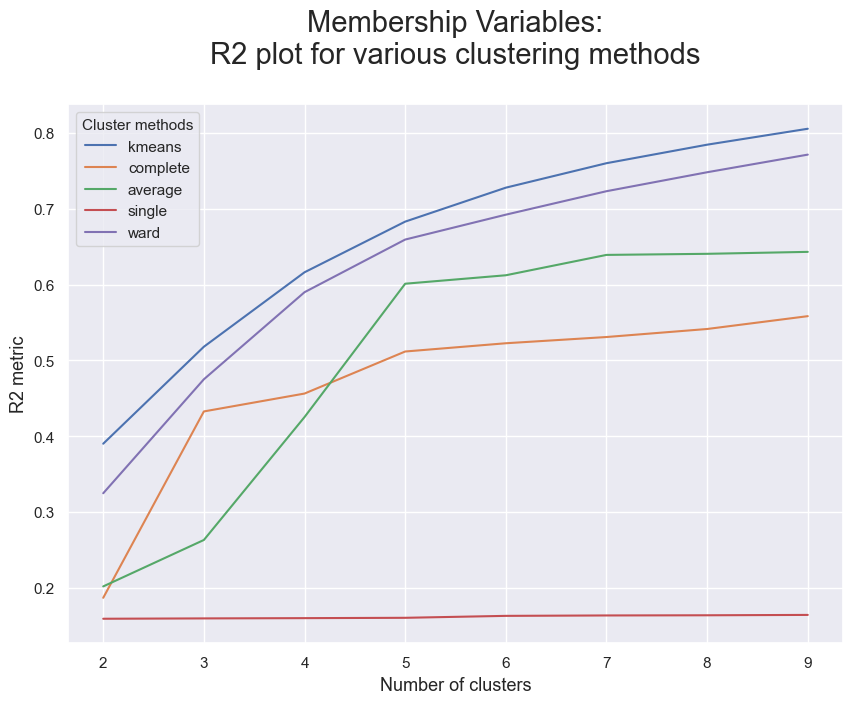

In [201]:
# Visualizing the R² scores for each cluster solution on membership variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Membership Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

---------------------

In [202]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_demographic = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
demographic_labels = kmeans_demographic.fit_predict(df_dem)
df_new['behavior_labels'] = demographic_labels

kmeans_membership = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
member_labels = kmeans_membership.fit_predict(df_member)
df_new['member_labels'] = member_labels


# Count label frequencies (contigency table)
pd.crosstab(df_new['behavior_labels'],
            df_new['member_labels'])

member_labels,0,1,2
behavior_labels,,,
0,123,1208,1052
1,213,1820,521
2,621,7815,886


#### Manual merging: Merge lowest frequency clusters into closest clusters

In [203]:
# Centroids of clusters
df_centroids = df_new.groupby(['behavior_labels', 'member_labels'])[metric_features].mean()

# Clusters with low freq uency to be merged:
# (behavior_labels, product_labels)
to_merge = [(0,0), (1,0), (1,2), (2,0), (2,2)]

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(euclidean, columns=df_centroids.index, index=df_centroids.index)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 0): (2, 0), (1, 0): (2, 0), (1, 2): (2, 2)}

In [204]:
df_ = df_new.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['behavior_labels']==source[0]) & (df_['member_labels']==source[1])
    df_.loc[mask, 'behavior_labels'] = target[0]
    df_.loc[mask, 'member_labels'] = target[1]

# New contigency table
pd.crosstab(df_['behavior_labels'],
            df_['member_labels'])

member_labels,0,1,2
behavior_labels,,,
0,0,1208,1052
1,0,1820,0
2,957,7815,1407


### Merging using Hierarchical clustering

In [205]:
# Centroids of the concatenated cluster labels
df_centroids = df_new.groupby(['behavior_labels', 'member_labels'])[metric_features].mean()
df_centroids

Age    Income  DaysWithoutFrequency  \
behavior_labels member_labels                                             
0               0             -0.732391 -0.928089             -0.115495   
                1             -1.325654 -1.350544             -0.050503   
                2             -1.046146 -1.063140             -0.244545   
1               0              1.396452  1.393592             -0.034874   
                1              1.585152  1.587173             -0.047395   
                2              1.649723  1.543233             -0.094799   
2               0             -0.093699 -0.089801             -0.008092   
                1             -0.182214 -0.161207              0.014481   
                2             -0.058819 -0.057824              0.251447   

                               LifetimeValue  NumberOfFrequencies  \
behavior_labels member_labels                                       
0               0                   1.192047             0.424602   
                1                   0.083234            -0.371737   
                2                   2.077448             1.003603   
1               0                   0.426534             0.256241   
                1                  -0.279071            -0.262247   
                2                   1.135906             1.459274   
2               0                  -0.180665            -0.111995   
                1                  -0.478586            -0.338338   
                2                   0.196522             0.743650   

                               AttendedClasses  NumberOfRenewals  \
behavior_labels member_labels                                      
0               0                     0.462430          0.977629   
                1                     0.136461         -0.221914   
                2                     1.964258          1.484339   
1               0                    -0.130933          0.445824   
                1                    -0.250156         -0.380403   
                2                     0.374117          1.419057   
2               0                    -0.267917          0.204518   
                1                    -0.315589         -0.476139   
                2                    -0.107614          1.343922   

                               NumberOfReferences  DaysEnrolled  \
behavior_labels member_labels                                     
0               0                       -0.131554      1.050580   
                1                        0.163628     -0.281743   
                2                        0.264850      1.550721   
1               0                       -0.131554      0.376892   
                1                       -0.131554     -0.434812   
                2                       -0.131554      1.447427   
2               0                       -0.131554      0.189065   
                1                       -0.112994     -0.481735   
                2                       -0.131554      1.406395   

                               NumberOfActivities  Regularity  
behavior_labels member_labels                                  
0               0                        2.801086   -0.266066  
                1                       -0.287039   -0.426333  
                2                       -0.257685   -0.141583  
1               0                        2.801086    0.049752  
                1                       -0.287039    0.128854  
                2                       -0.287039    0.208275  
2               0                        2.801086   -0.192444  
                1                       -0.287039    0.047973  
                2                       -0.276583   -0.126559

In [206]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None)

hclust_labels = hclust.fit_predict(df_centroids)

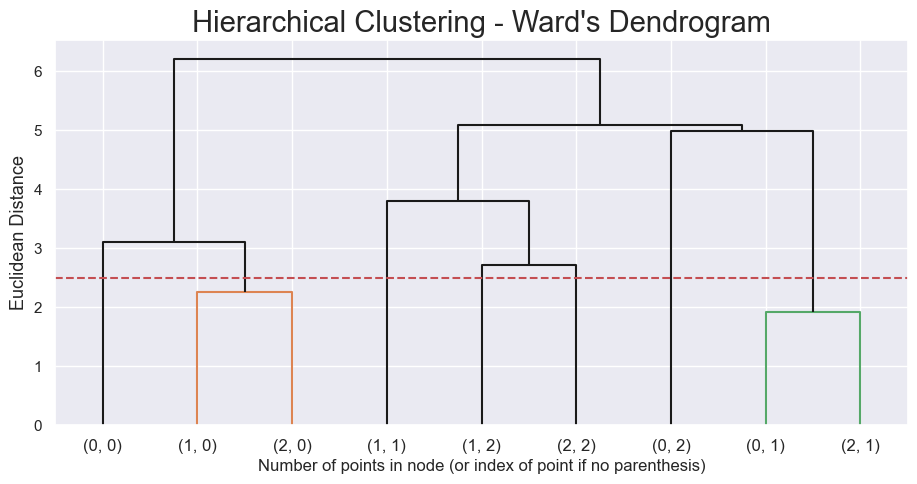

In [207]:
# Create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])  # hclust.children_ contains the observation ids that are being merged together
n_samples = len(hclust.labels_)

# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack([hclust.children_, hclust.distances_, counts]).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 2.5
dendrogram(linkage_matrix, 
           truncate_mode = 'level', 
           labels = df_centroids.index,
           p = 5,
           color_threshold = y_threshold,
           above_threshold_color = 'k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [208]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=7)

hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels
df_centroids

Age    Income  DaysWithoutFrequency  \
behavior_labels member_labels                                             
0               0             -0.732391 -0.928089             -0.115495   
                1             -1.325654 -1.350544             -0.050503   
                2             -1.046146 -1.063140             -0.244545   
1               0              1.396452  1.393592             -0.034874   
                1              1.585152  1.587173             -0.047395   
                2              1.649723  1.543233             -0.094799   
2               0             -0.093699 -0.089801             -0.008092   
                1             -0.182214 -0.161207              0.014481   
                2             -0.058819 -0.057824              0.251447   

                               LifetimeValue  NumberOfFrequencies  \
behavior_labels member_labels                                       
0               0                   1.192047             0.424602   
                1                   0.083234            -0.371737   
                2                   2.077448             1.003603   
1               0                   0.426534             0.256241   
                1                  -0.279071            -0.262247   
                2                   1.135906             1.459274   
2               0                  -0.180665            -0.111995   
                1                  -0.478586            -0.338338   
                2                   0.196522             0.743650   

                               AttendedClasses  NumberOfRenewals  \
behavior_labels member_labels                                      
0               0                     0.462430          0.977629   
                1                     0.136461         -0.221914   
                2                     1.964258          1.484339   
1               0                    -0.130933          0.445824   
                1                    -0.250156         -0.380403   
                2                     0.374117          1.419057   
2               0                    -0.267917          0.204518   
                1                    -0.315589         -0.476139   
                2                    -0.107614          1.343922   

                               NumberOfReferences  DaysEnrolled  \
behavior_labels member_labels                                     
0               0                       -0.131554      1.050580   
                1                        0.163628     -0.281743   
                2                        0.264850      1.550721   
1               0                       -0.131554      0.376892   
                1                       -0.131554     -0.434812   
                2                       -0.131554      1.447427   
2               0                       -0.131554      0.189065   
                1                       -0.112994     -0.481735   
                2                       -0.131554      1.406395   

                               NumberOfActivities  Regularity  hclust_labels  
behavior_labels member_labels                                                 
0               0                        2.801086   -0.266066              5  
                1                       -0.287039   -0.426333              2  
                2                       -0.257685   -0.141583              3  
1               0                        2.801086    0.049752              0  
                1                       -0.287039    0.128854              4  
                2                       -0.287039    0.208275              6  
2               0                        2.801086   -0.192444              0  
                1                       -0.287039    0.047973              2  
                2                       -0.276583   -0.126559              1

In [209]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_new.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['member_labels'])], axis=1)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,NumberOfRenewals,NumberOfReferences,DaysEnrolled,NumberOfActivities,Regularity
merged_labels,,,,,,,,,,,
0,0.286879,0.289051,-0.014932,-0.025589,-0.017949,-0.232932,0.266147,-0.131554,0.237035,2.801086,-0.130588
1,-0.058819,-0.057824,0.251447,0.196522,0.743650,-0.107614,1.343922,-0.131554,1.406395,-0.276583,-0.126559
2,-0.335298,-0.320436,0.005781,-0.403370,-0.342809,-0.255068,-0.442103,-0.075960,-0.454960,-0.287039,-0.015527
3,-1.046146,-1.063140,-0.244545,2.077448,1.003603,1.964258,1.484339,0.264850,1.550721,-0.257685,-0.141583
4,1.585152,1.587173,-0.047395,-0.279071,-0.262247,-0.250156,-0.380403,-0.131554,-0.434812,-0.287039,0.128854
5,-0.732391,-0.928089,-0.115495,1.192047,0.424602,0.462430,0.977629,-0.131554,1.050580,2.801086,-0.266066
6,1.649723,1.543233,-0.094799,1.135906,1.459274,0.374117,1.419057,-0.131554,1.447427,-0.287039,0.208275


In [185]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels').size().to_frame()

# Getting the product and behavior labels
df_counts = df_counts.rename({v:k for k, v in cluster_mapper.items()}).reset_index()

df_counts['behavior_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['product_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='behavior_labels', columns='product_labels')

product_labels,0,1,2
behavior_labels,,,
0,1096.0,NaN,NaN
1,538.0,1512.0,504.0
2,937.0,7942.0,1730.0


### Cluster Analysis

In [191]:
# Setting df to have the final product, behavior and merged clusters
df_final = df_.copy()

In [192]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0.
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='C:\\Users\\maria\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.

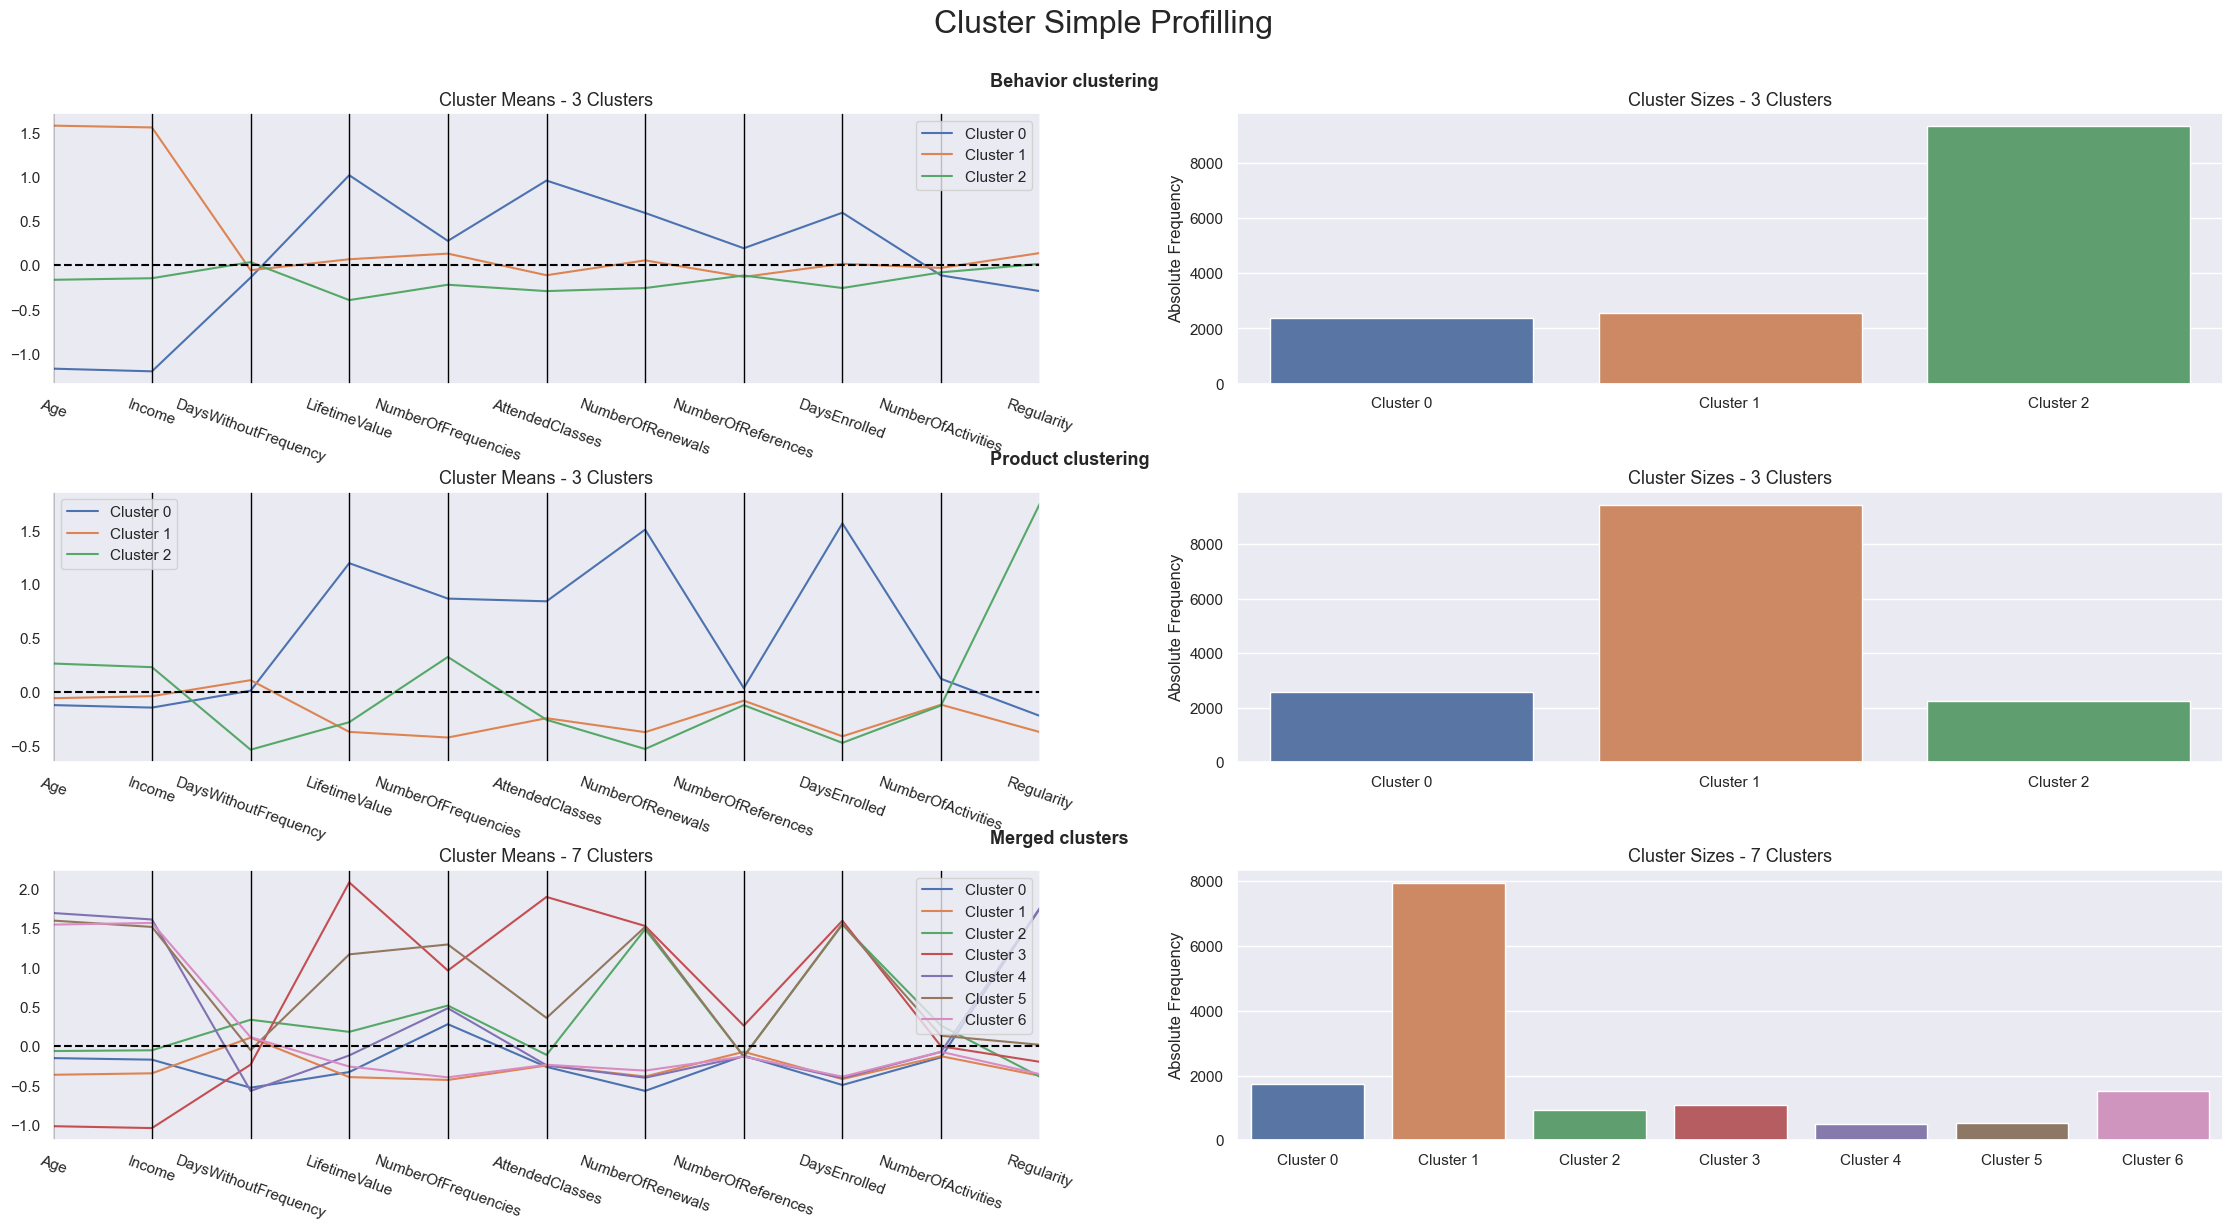

In [193]:
# Profilling each cluster (behavior, member, merged)
cluster_profiles(
    df = df_final[metric_features + ['behavior_labels', 'member_labels', 'merged_labels']], 
    label_columns = ['behavior_labels', 'member_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Behavior clustering", "Product clustering", "Merged clusters"]
)